# Entrenado redes Feed-Forward

Usaremos keras para de manera muy fácil entrenar redes feed-forward usando descenso estocástico de  gradiente.

In [13]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [14]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [15]:
# Cargamos los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

(60000, 28, 28)
(60000,)


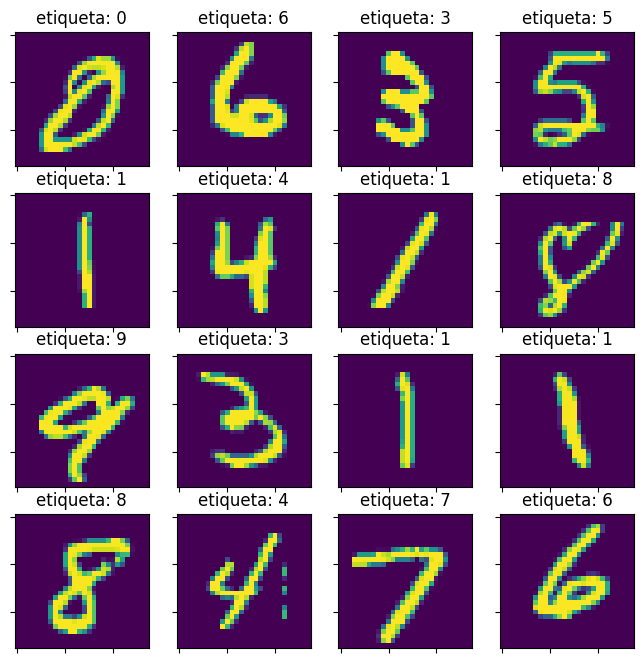

In [16]:
# Mostramos una grilla de ejemplos (al azar)

h = 4 # alto de la grilla
w = 4 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title("etiqueta: " + str(labs[ex]))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

In [17]:
# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


In [18]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

60000 784 10


In [19]:
# tamaños de capas escondidas

h1 = 64
h2 = 32

In [20]:
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 64)                50240     
                                                                 
 segunda_capa (Dense)        (None, 32)                2080      
                                                                 
 capa_de_output (Dense)      (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [22]:
# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.

h = red.fit(X, Y,
        epochs=5,
        batch_size=1,
       )

Epoch 1/5
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2569 - accuracy: 0.9215
Epoch 2/5
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1317 - accuracy: 0.9608
Epoch 3/5
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1031 - accuracy: 0.9681
Epoch 4/5
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0853 - accuracy: 0.9740
Epoch 5/5
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0738 - accuracy: 0.9776


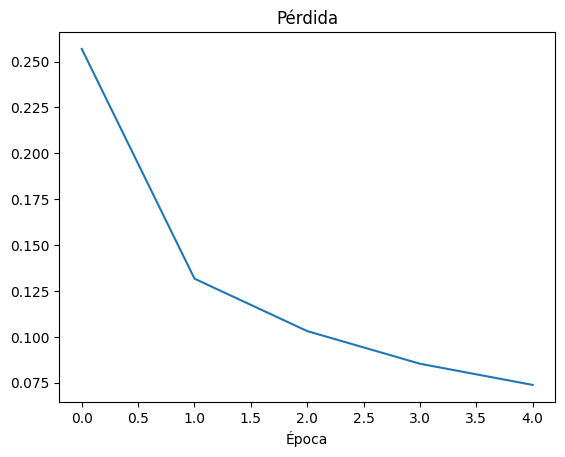

In [23]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()


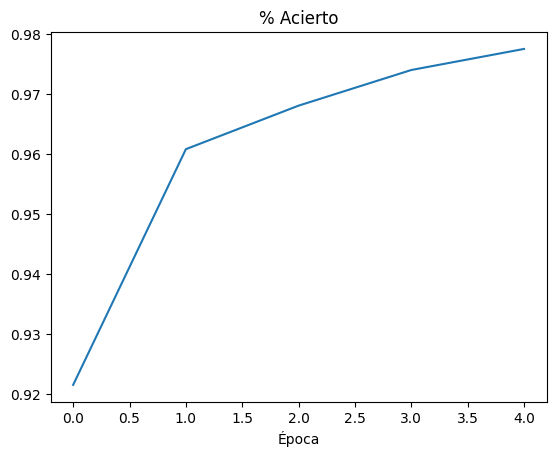

In [24]:
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()


1/1 [==============================] - 0s 20ms/step


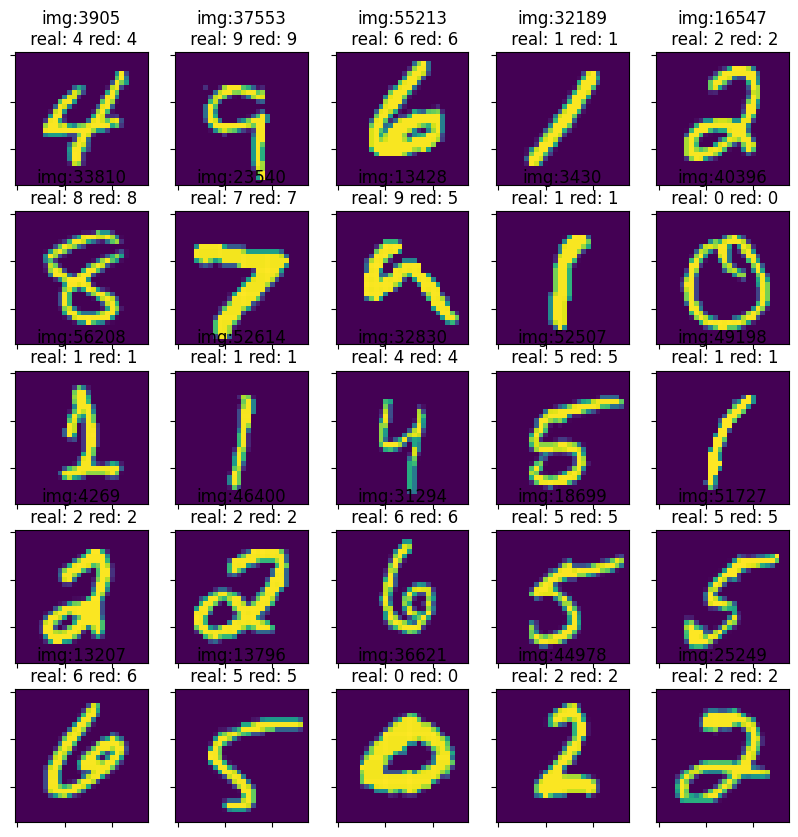

In [25]:
# Veamos algunas predicciones
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

## Ejercicio 1: ¿Sin normalizar datos?

Elimina la parte del código anterior que normaliza los datos (donde dividimos por 255) y mira qué le pasa al entrenamiento. No tiene que escribir nuevo código, sólo saca esa parte y reentrena  la red (debes crear otra vez la red, compilarla y luego  hacer `fit`)

## Ejercicio 2: Entrenando por más épocas

Entrena la red, esta vez por más épocas (pueba con 20 o 30). Para comenzar el entrenamiento desde 0 otra vez, debes reconstruir la red y luego ejecutar `.compile` otra vez (puedes copiar el código de arriba). Luego del entrenamiento, imprime la historia y compáralo con el resultado anterior.

Hazle cambios a la red o al entrenamiento para intentar mejorar aun más el acierto. Comenta con tus compañeros qué cambios podrían dar buenos resultados y pruébalos ¿Hasta qué acierto puedes llegar?

(IMPORTANTE: No olvides normalizar el input de la red otra vez)

In [ ]:
# Reconstruimos y recompilamos la red

h1 = 64
h2 = 32

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Acá empieza tu código para entrenamiento  (~3 líneas)

h = red.fit(X, Y,
        epochs=20,
        batch_size=1,
       )
# Acá termina tu código

Epoch 1/20
50000/50000 [==============================] - 195s 3ms/step - loss: 2.0248 - accuracy: 0.2298
Epoch 2/20
50000/50000 [==============================] - 138s 3ms/step - loss: 1.9619 - accuracy: 0.2587
Epoch 3/20
50000/50000 [==============================] - 141s 3ms/step - loss: 1.9439 - accuracy: 0.2730
Epoch 4/20
50000/50000 [==============================] - 141s 3ms/step - loss: 1.9081 - accuracy: 0.2912
Epoch 5/20
50000/50000 [==============================] - 138s 3ms/step - loss: 1.8758 - accuracy: 0.3086
Epoch 6/20
50000/50000 [==============================] - 137s 3ms/step - loss: 1.8574 - accuracy: 0.3235
Epoch 7/20
50000/50000 [==============================] - 140s 3ms/step - loss: 1.8436 - accuracy: 0.3308
Epoch 8/20
50000/50000 [==============================] - 139s 3ms/step - loss: 1.8289 - accuracy: 0.3376
Epoch 9/20
50000/50000 [==============================] - 138s 3ms/step - loss: 1.8175 - accuracy: 0.3403
Epoch 10/20
12569/50000 [======>..............

ValueError: cannot reshape array of size 3072 into shape (1,784)

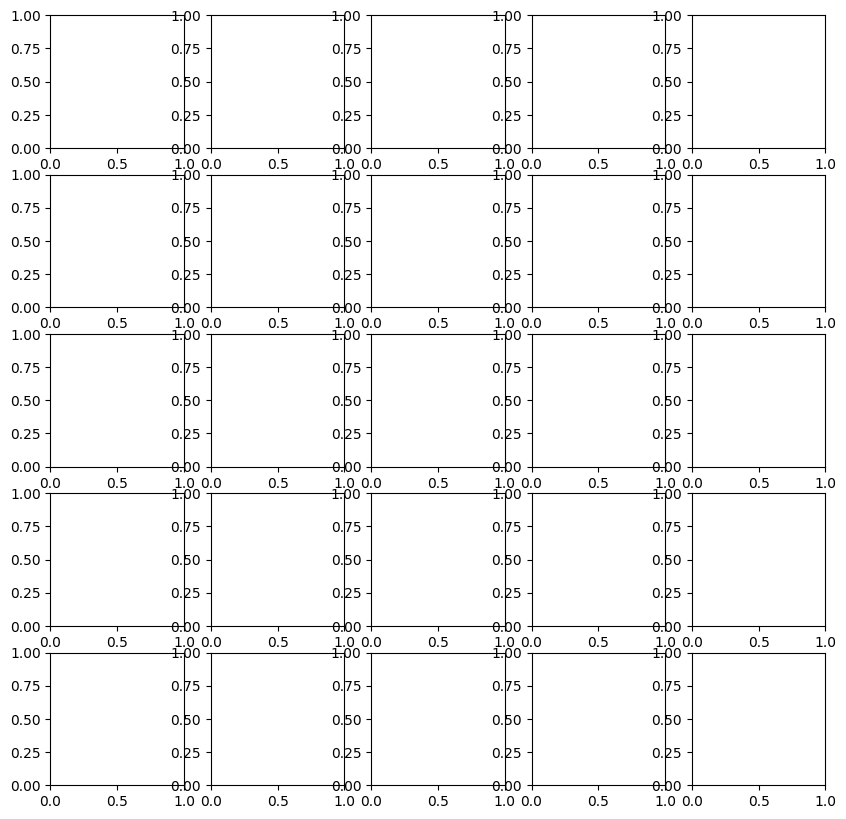

In [36]:
# Imprime el porcentaje de acierto para cada época

# Acá empieza tu código  (~5 líneas)


# Acá termina tu código

# CIFAR10: Entrenando con datos mas complejos

Entrenaremos una red para aprender los datos de [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Este es un conjunto de 50.000 imágenes de entrenamiento etiquetadas en 10 clases (0:avión, 1:automobil, 2:pájaro, 3:gato, 4:venado, 5:perro, 6:rana, 7:caballo, 8:barco, 9:camión).

Comenzaremos cargando los datos y mostrando algunos ejemplos

In [28]:
(imgs,labs), _ = keras.datasets.cifar10.load_data()
print(imgs.shape)
print(labs.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [29]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

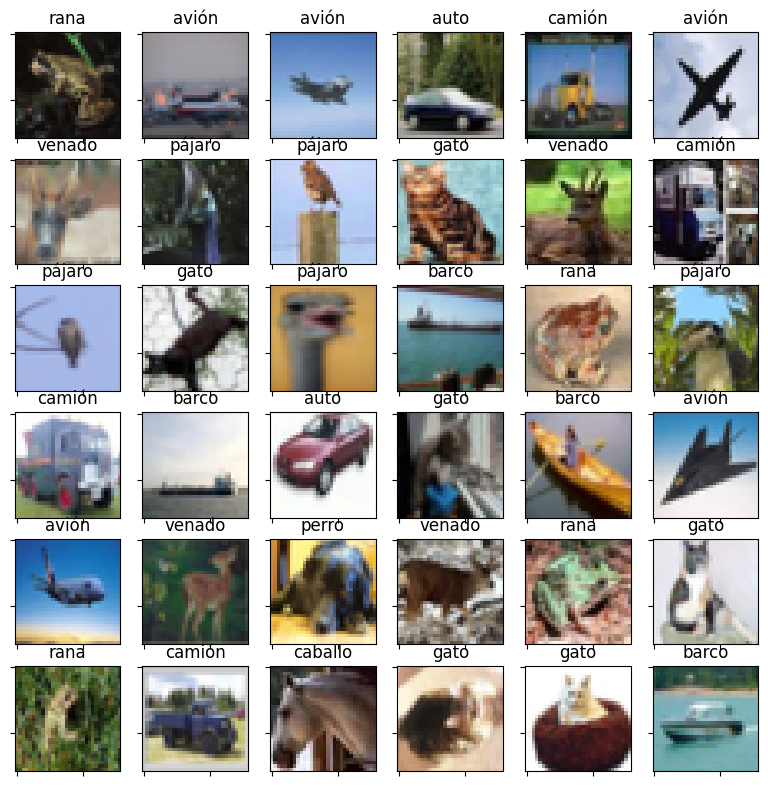

In [30]:
# Mostramos una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])

In [31]:
# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(50000,32*32*3)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(50000, 3072)
(50000, 10)


In [32]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

50000 3072 10


##  Ejercicio 3: Entrenando con CIFAR10

Ahora usa todo lo que  has aprendido para crear una red y  entrenar con los datos de CIFAR10. Trata de crear una red que alcance al menos unn  55% de acierto en los datos de entrenamiento. Esta parte requiere bastante más código! Al finalizar muestra  una grilla con las predicciones de tu red.

In [33]:
# Crea la red, compílala, entrénala, muestra el acierto por época
# y finalmente muestra ejemplos de las predicciones

